In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import json
from typing import List, Dict

### Relations

In [2]:
def read_jsonl_file(filename: str) -> List[Dict]:
    dataset = []
    with open(filename) as f:
        for line in f:
            loaded_example = json.loads(line)
            dataset.append(loaded_example)

    return dataset

In [23]:
data = read_jsonl_file("../data/LAMA/data/ConceptNet/test.jsonl")

In [24]:
relations = [line["pred"] for line in data]

In [25]:
rel_map = {}

In [28]:
for line in relations:
    if line in rel_map:
        rel_map[line] += 1
    else:
        rel_map[line] = 1

In [29]:
rel_map

{'HasSubevent': 1456,
 'MadeOf': 510,
 'HasPrerequisite': 1328,
 'MotivatedByGoal': 690,
 'AtLocation': 4000,
 'CausesDesire': 522,
 'IsA': 4000,
 'NotDesires': 1160,
 'Desires': 1150,
 'CapableOf': 1538,
 'PartOf': 1158,
 'HasA': 1590,
 'UsedFor': 4000,
 'ReceivesAction': 984,
 'Causes': 1794,
 'HasProperty': 3894}

In [30]:
sum(rel_map.values())

29774

In [26]:
s = set(relations)

In [27]:
s

{'AtLocation',
 'CapableOf',
 'Causes',
 'CausesDesire',
 'Desires',
 'HasA',
 'HasPrerequisite',
 'HasProperty',
 'HasSubevent',
 'IsA',
 'MadeOf',
 'MotivatedByGoal',
 'NotDesires',
 'PartOf',
 'ReceivesAction',
 'UsedFor'}

## Analysis of LAMA probe results

In [3]:
x_values = [1,10,100]

### For all relations (n=26500)

In [71]:
bert_base_uncased = [15.28, 38.96, 64.90]
base_uncased_houlsby100 = [11.58, 31.34, 57.27]
roberta_base = [23.27, 51.10, 91.81]
roberta_houlsby_100k = [18.14, 45.10, 81.40] 

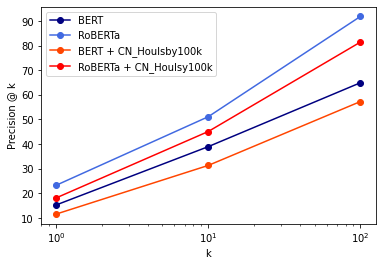

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [102]:
fig = plt.figure()
ax = fig.add_subplot()
line, = ax.plot(x_values,bert_base_uncased, marker='o', color='navy', label="BERT")
line, = ax.plot(x_values,roberta_base, marker='o', color='royalblue', label="RoBERTa")
line, = ax.plot(x_values,base_uncased_houlsby100, marker='o', color='orangered', label="BERT + CN_Houlsby100k")
line, = ax.plot(x_values,roberta_houlsby_100k, marker='o', color='red', label="RoBERTa + CN_Houlsy100k")
ax.set_xscale('log')
plt.ylabel("Precision @ k")
plt.xlabel("k")
plt.legend()
plt.show()
fig.savefig('all_result.eps', format="eps")

# For the IsA relation (n=4000)

In [50]:
base_isA = [19.80, 49.98, 73.36]
adapter_isA = [20.95, 51.15, 76.68]
roberta_isA = [24.12, 55.28, 93.58]
roberta_adapter_isA = [23.56, 59.13, 95.94]

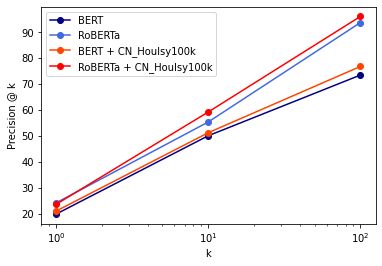

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [101]:
fig = plt.figure()
ax = fig.add_subplot()
line, = ax.plot(x_values,base_isA, marker='o', color='navy', label="BERT")
line, = ax.plot(x_values,roberta_isA, marker='o', color='royalblue', label="RoBERTa")
line, = ax.plot(x_values,adapter_isA, marker='o', color='orangered', label="BERT + CN_Houlsy100k")
line, = ax.plot(x_values,roberta_adapter_isA, marker='o', color='red', label="RoBERTa + CN_Houlsy100k")
ax.set_xscale('log')
plt.ylabel("Precision @ k")
plt.xlabel("k")
plt.legend()
plt.show()
fig.savefig('isA_result.eps', format="eps")

# Using the LAMA relations as the training data for the adapter


### BERT base Houlsby config Lauscher Relations VS Bert base Houlsby config my relations

In [6]:
lauscher_rel = [11.58, 31.34, 57.27]
my_rel = [15.36, 42.11, 71.29]
bert_base_uncased = [15.28, 38.96, 64.90]

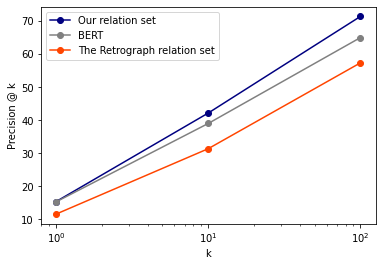

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [7]:
fig = plt.figure()
ax = fig.add_subplot()
line, = ax.plot(x_values,my_rel, marker='o', color='navy', label="Our relation set")
line, = ax.plot(x_values,bert_base_uncased, marker='o', color='gray', label="BERT")
line, = ax.plot(x_values,lauscher_rel, marker='o', color='orangered', label="The Retrograph relation set")
ax.set_xscale('log')
plt.ylabel("Precision @ k")
plt.xlabel("k")
plt.legend()
plt.show()
fig.savefig('all_LAMA_result.eps', format="eps")